In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load your dataset
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Check the data
df


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
ADF Statistic: -2.829266824169992
p-value: 0.0542132902838265


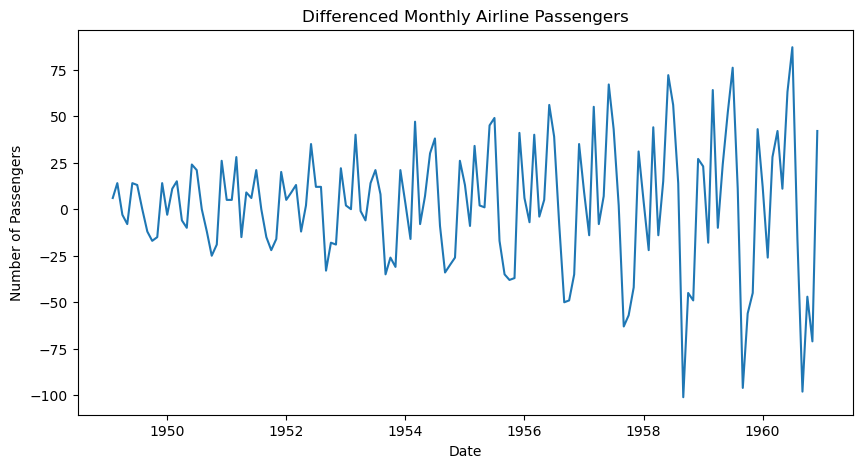

In [3]:
# Check for stationarity
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
df_diff = df['#Passengers'].diff().dropna()

# Check for stationarity again
result = adfuller(df_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(df_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [4]:
# Assuming df_diff is the differenced data and is already created from the previous steps

# Fit the ARMA(1, 1) model
model = ARIMA(df_diff, order=(1, 0, 1))  # p=1, d=0, q=1 for ARMA(1, 1)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -694.061
Date:                Mon, 22 Jul 2024   AIC                           1396.122
Time:                        13:23:12   BIC                           1407.973
Sample:                    02-01-1949   HQIC                          1400.937
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4507      3.441      0.712      0.476      -4.293       9.195
ar.L1         -0.4767      0.128     -3.735      0.000      -0.727      -0.227
ma.L1          0.8645      0.080     10.743      0.0

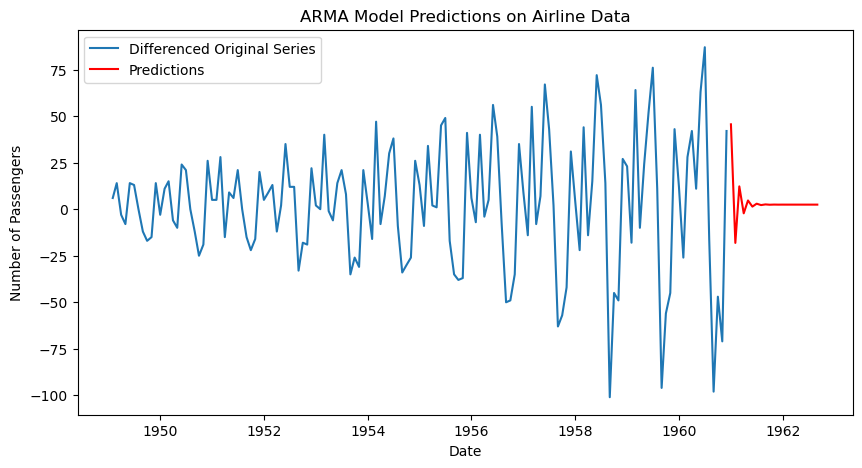

In [6]:
# Make predictions
start = len(df_diff)
end = start + 20
predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df_diff, label='Differenced Original Series')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()



